# **Crop Recommendation**

In [81]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [82]:
# Reading the data 

crop_data_path = '/content/drive/MyDrive/CSE305-ML/project/cpdata.csv'
fertilizer_data_path = '/content/drive/MyDrive/CSE305-ML/project/Fertilizer.csv'

crop = pd.read_csv(crop_data_path)
fert = pd.read_csv(fertilizer_data_path)

In [83]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
crop.tail()

,temperature,humidity,ph,rainfall,label
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon
3099,26.986037,89.413849,6.260839,58.548767,watermelon


In [85]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5


In [86]:
crop.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [87]:
fert.describe()

,Unnamed: 0,N,P,K,pH
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,921.000000,59.896907,43.453608,45.463918,5.588660
std,532.172591,36.328744,27.065517,36.130181,0.755267
min,0.000000,10.000000,10.000000,10.000000,2.920000
25%,460.500000,20.000000,20.000000,20.000000,5.080000
50%,921.000000,50.000000,40.000000,40.000000,5.560000
75%,1381.500000,90.000000,60.000000,60.000000,6.320000
max,1842.000000,180.000000,125.000000,200.000000,6.680000


# Preprocessing

In [88]:
# Function for lowering the cases
def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i

In [89]:
fert['Crop'] = fert['Crop'].apply(change_case)
crop['label'] = crop['label'].apply(change_case)

In [90]:
#make some changes in ferttilizer dataset

fert['Crop'] = fert['Crop'].replace('mungbeans','mungbean')
fert['Crop'] = fert['Crop'].replace('lentils(masoordal)','lentil')
fert['Crop'] = fert['Crop'].replace('pigeonpeas(toordal)','pigeonpeas')
fert['Crop'] = fert['Crop'].replace('mothbean(matki)','mothbeans')
fert['Crop'] = fert['Crop'].replace('chickpeas(channa)','chickpea')

In [91]:
crop_names = crop['label'].unique()
crop_names

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [92]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,1,jowar(sorghum),80,40,40,5.5
2,2,barley(jav),70,40,45,5.5
3,3,maize,80,40,20,5.5
4,4,ragi(naachnnii),50,40,20,5.5


In [93]:
del fert['Unnamed: 0']

In [94]:
crop_names_from_fert = fert['Crop'].unique()
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpea', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'greenpeas', 'horsegram(kulthi)',
       'blackgram', 'rapeseed(mohri)', 'corianderseeds', 'mustardseeds',
       'sesameseed', 'cuminseeds', 'lentil', 'brinjal', 'beetroot',
       'bittergourd', 'bottlegourd', 'capsicum', 'cabbage', 'carrot',
       'cauliflower', 'cucumber', 'corianderleaves', 'curryleaves',
       'drumstick–moringa', 'chili', 'ladyfinger', 'mushroom', 'onion',
       'potato', 'pumpkin', 'radish', 'olive', 'sweetpotato',
       'fenugreekleaf(methi)', 'spinach', 'ridgegourd',
       'gooseberry(amla)', 'jambun(syzygiumcumini)',
       'ziziphusmauritiana(bor)', 'garciniaindica(kokam)', 'tamarind',
       'tapioca(suran)', 'garlic', 'lemon', 'tomato', 'ashgourd',
       '

In [95]:
for i in crop_names_from_fert:
    print(crop[crop['label'] == i])

    temperature   humidity        ph    rainfall label
0     20.879744  82.002744  6.502985  202.935536  rice
1     21.770462  80.319644  7.038096  226.655537  rice
2     23.004459  82.320763  7.840207  263.964248  rice
3     26.491096  80.158363  6.980401  242.864034  rice
4     20.130175  81.604873  7.628473  262.717340  rice
..          ...        ...       ...         ...   ...
95    22.683191  83.463583  6.604993  194.265172  rice
96    21.533463  82.140041  6.500343  295.924880  rice
97    21.408658  83.329319  5.935745  287.576694  rice
98    26.543481  84.673536  7.072656  183.622266  rice
99    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 5 columns]
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
     temperature   humidity        ph    rainfall  label
500    22.613600  63.690706  5.749914   87.759539  maize
501    26.100184  71.574769  6.931757  102

In [96]:
crop['label']

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

In [97]:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)

In [98]:
# using extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop.columns)
new_fert = pd.DataFrame(columns = fert.columns)

In [99]:
for label in extract_labels:
    new_crop = new_crop.append(crop[crop['label'] == label])

In [100]:
for label in extract_labels:
    new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])

In [101]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
895,26.774637,66.413269,6.780064,177.774507,coffee
896,27.417112,56.636362,6.086922,127.924610,coffee
897,24.131797,67.225123,6.362608,173.322839,coffee
898,26.272418,52.127394,6.758793,127.175293,coffee


In [102]:
new_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
3,maize,80,40,20,5.5
5,chickpea,40,60,80,5.5
12,kidneybeans,20,60,20,5.5
13,pigeonpeas,20,60,20,5.5
14,mothbeans,20,40,20,5.5
15,mungbean,20,40,20,5.5
18,blackgram,40,60,20,5.0
24,lentil,20,60,20,5.5
60,pomegranate,20,10,40,5.5


In [103]:
new_crop.to_csv('/content/drive/MyDrive/CSE305-ML/project/MergeFileCrop.csv')
new_fert.to_csv('/content/drive/MyDrive/CSE305-ML/project/Data-processed/fertilizerdata.csv')

In [104]:
fertilizer_data_path = '/content/drive/MyDrive/CSE305-ML/project/Data-processed/fertilizerdata.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [105]:
del merge_fert['Unnamed: 0']

In [106]:
merge_crop = pd.read_csv('/content/drive/MyDrive/CSE305-ML/project/MergeFileCrop.csv')
reco_fert = merge_fert

In [107]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [108]:
temp

,N,P,K
0,92,45,40
1,61,47,39
2,76,46,38
3,86,56,36
4,88,55,41
...,...,...,...
2195,93,39,31
2196,110,18,35
2197,89,24,31
2198,107,30,31


In [109]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [110]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,92,45,40
1,1,21.770462,80.319644,7.038096,226.655537,rice,61,47,39
2,2,23.004459,82.320763,7.840207,263.964248,rice,76,46,38
3,3,26.491096,80.158363,6.980401,242.864034,rice,86,56,36
4,4,20.130175,81.604873,7.628473,262.717340,rice,88,55,41
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,93,39,31
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,110,18,35
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,89,24,31
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,107,30,31


In [111]:
del merge_crop['Unnamed: 0']

In [112]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,92,45,40
1,21.770462,80.319644,7.038096,226.655537,rice,61,47,39
2,23.004459,82.320763,7.840207,263.964248,rice,76,46,38
3,26.491096,80.158363,6.980401,242.864034,rice,86,56,36
4,20.130175,81.604873,7.628473,262.717340,rice,88,55,41
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,93,39,31
2196,27.417112,56.636362,6.086922,127.924610,coffee,110,18,35
2197,24.131797,67.225123,6.362608,173.322839,coffee,89,24,31
2198,26.272418,52.127394,6.758793,127.175293,coffee,107,30,31


In [113]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [114]:
merge_crop.to_csv("/content/drive/MyDrive/CSE305-ML/project/Data-processed/crop_recommendation.csv",index=False)

In [115]:
# Checking if everything went fine
df = pd.read_csv('/content/drive/MyDrive/CSE305-ML/project/Data-processed/crop_recommendation.csv')

In [116]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,92,45,40,20.879744,82.002744,6.502985,202.935536,rice
1,61,47,39,21.770462,80.319644,7.038096,226.655537,rice
2,76,46,38,23.004459,82.320763,7.840207,263.964248,rice
3,86,56,36,26.491096,80.158363,6.980401,242.864034,rice
4,88,55,41,20.130175,81.604873,7.628473,262.717340,rice


In [117]:
df.shape

(2200, 8)

# Exploratory data Analysis and Visualisation

In [118]:
fin_fert = pd.read_csv('/content/drive/MyDrive/CSE305-ML/project/Data-processed/fertilizerdata.csv')
fin_cprec = pd.read_csv('/content/drive/MyDrive/CSE305-ML/project/Data-processed/crop_recommendation.csv')

In [119]:
fin_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [120]:
fin_fert.describe()

,Unnamed: 0,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,48.681818,50.454545,45.681818,48.181818,5.409091
std,33.540858,36.315715,32.634172,51.698426,0.590326
min,0.000000,20.000000,10.000000,10.000000,4.000000
25%,14.250000,20.000000,20.000000,20.000000,5.500000
50%,61.500000,30.000000,40.000000,30.000000,5.500000
75%,72.750000,80.000000,60.000000,50.000000,5.500000
max,95.000000,120.000000,125.000000,200.000000,6.500000


In [121]:
fin_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

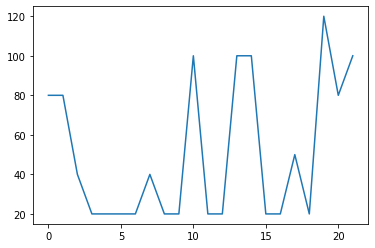

In [122]:
plt.plot(fin_fert["N"])

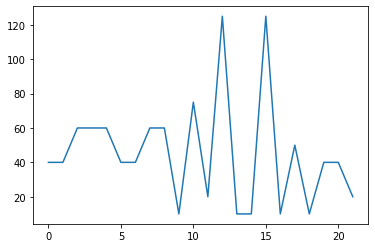

In [123]:
plt.plot(fin_fert["P"])

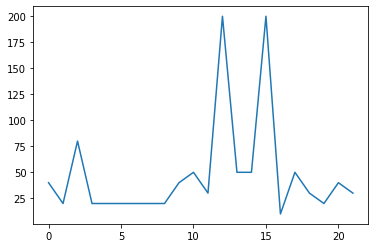

In [124]:
plt.plot(fin_fert["K"])

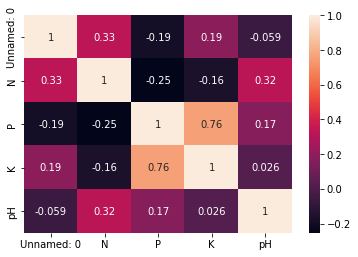

In [125]:
sns.heatmap(fin_fert.corr(),annot=True)

In [126]:
fin_cprec.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,92,45,40,20.879744,82.002744,6.502985,202.935536,rice
1,61,47,39,21.770462,80.319644,7.038096,226.655537,rice
2,76,46,38,23.004459,82.320763,7.840207,263.964248,rice
3,86,56,36,26.491096,80.158363,6.980401,242.864034,rice
4,88,55,41,20.130175,81.604873,7.628473,262.717340,rice


In [127]:
fin_cprec.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.780909,52.968182,48.315909,25.616244,71.481779,6.469480,103.463655
std,37.575429,32.969247,50.591991,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,27.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,50.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,87.250000,67.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,139.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [133]:
fin_cprec['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

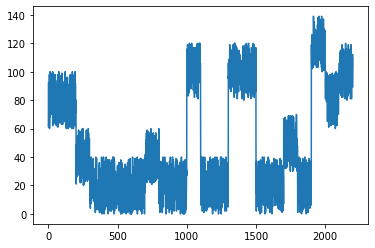

In [129]:
plt.plot(fin_cprec["N"])

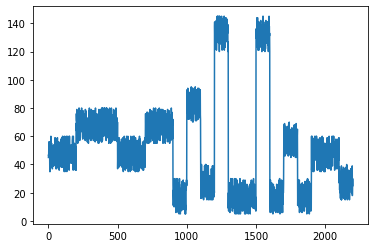

In [130]:
plt.plot(fin_cprec["P"])

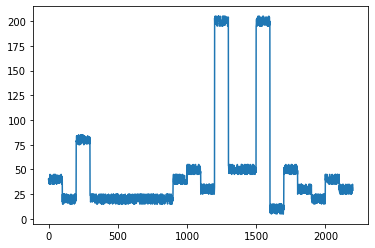

In [131]:
plt.plot(fin_cprec["K"])

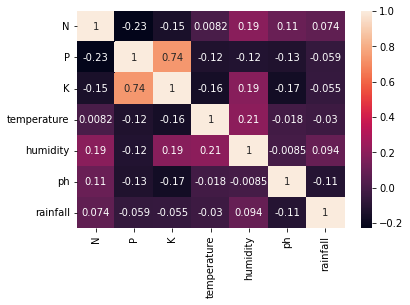

In [132]:
sns.heatmap(fin_cprec.corr(),annot=True)

# Seperating features and target label

In [134]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [135]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [136]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.13636363636364
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.70      1.00      0.82        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.86      0.93        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.82      0.67      0.74        21
       mango       1.00      0.96      0.98        26
   mothbeans       0.74      0.89      0.81        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [140]:
score

array([0.93409091, 0.90681818, 0.91136364, 0.92045455, 0.93409091])

# Guassian Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [142]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99090909, 0.99090909, 0.99090909])

# Support Vector Machine (SVM)

In [143]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [144]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.975     , 0.98409091, 0.97954545, 0.98409091])

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9590909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.87      0.81      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.86      0.95      0.90        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [146]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.97272727, 0.94545455, 0.96363636, 0.95681818, 0.95909091])

# Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [148]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99318182, 0.98636364, 0.98636364])

# XGBoost

In [149]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [150]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98863636, 0.99318182, 0.98636364, 0.98181818, 0.99318182])

## Accuracy Comparison

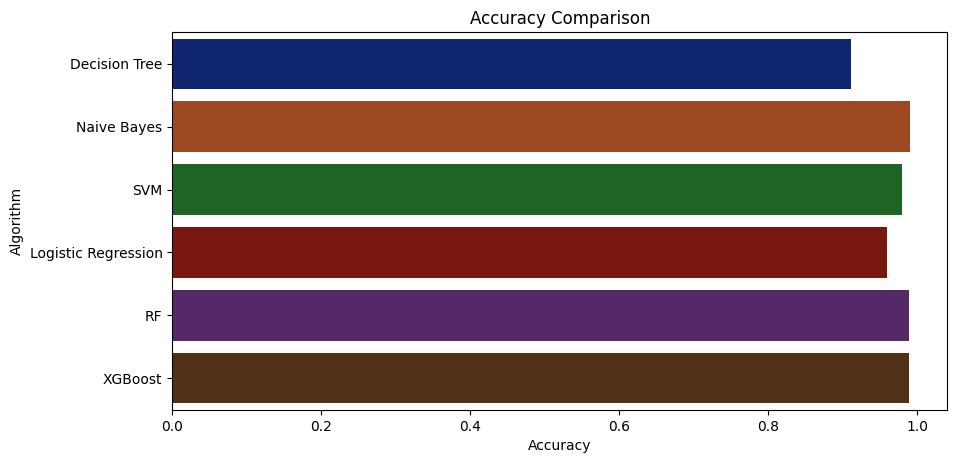

In [151]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [152]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9113636363636364
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9590909090909091
RF --> 0.9886363636363636
XGBoost --> 0.9886363636363636


## Making a prediction

In [153]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [154]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
